# Part II - (Used Car Data Exploration)

## by (David Kayode Oluwadare)

## Dataset Overview

> There is an automobile company KKFOSU from India which aspires to enter the Indian used-car market by setting up their company locally to give competition to their counterparts. Based on various market surveys, the consulting firm has gathered a large dataset of different types of used   cars across the market. 

> There are 7906 Sales IDs in the dataset with 18 features ('Sales_ID', 'name', 'year','selling_price', 'km_driven', 'Region','State or Province', 'City', 'fuel', 'seller_type', 'transmission','owner', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'sold').

> Most variables are categorical in nature, but the variables 'Sales_id', 'year','km_driven, 'selling_price', 'km_driven' 'mileage', 'engine','seats' are numerical factor variables. The 'torque' variable is arguably not needed in the project.


## Investigation Overview

AIM :  

> To understanding in details the Selling price of cars by Year, In what year did Used cars got costler?

> To understanding in details the State/Province of cars by Mileage and Km Driven, What are the Provinces where the cars     were used the most

> Lastly to accertain if cars were sold and perhaps the seller type, Which cars were sold and which are not sold yet?

## PRELIMINARY WRANGLING

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
car = pd.read_csv('UserCarData.csv')

In [3]:
#Drop the unnecessary columns (torque and max_power)
car.drop(columns=['torque','max_power'], axis= 1, inplace=True)

### OBSERVATION & DECISIONS

* There are no null records in any columns
* There are 31 differsnt cars in the data
* According to data type there are 8 numerical and 9 categorical columns.
* Will have to drop torque column as it doesn't really much in the analysis.

### UNIVARIATE EXPLORATION

>In this section, i will investigate distributions of individual variables, looking to find unusual points or outliers, taking a deeper look to clean things, preparing myself to look at relationships between variables.

> I will be using the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.**

### Distribution of selling price of car

The price ranges from 0-6million INR, the most occurred price is 300,000 INR

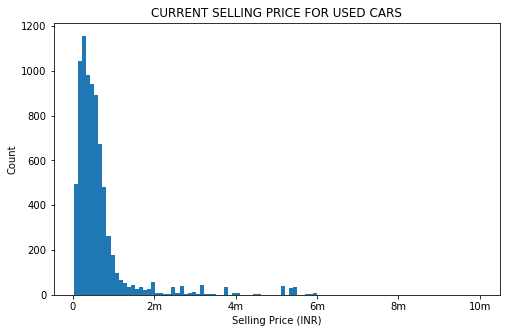

0    300000
dtype: int64

In [4]:
#Create a standard figure size
plt.figure(figsize = [8, 5]) 

#Matplotlib plotting with a fixed bins 100
ax = plt.gca()
ax.ticklabel_format(style='plain')
ax = sb.distplot(car.selling_price, kde=False, bins= 100, hist_kws = {'alpha': 1})
ax.set_title('CURRENT SELLING PRICE FOR USED CARS')
ax.set_xlabel('Selling Price (INR)')
ax.set_ylabel('Count')

#convert the x-axis to a exponential figure
plt.xticks([0, 2e6, 4e6, 6e6, 8e6, 10e6], [0, '2m','4m','6m','8m','10m'])
plt.show();

#Check the modal occurrence of the car selling price
car.selling_price.mode()

In [5]:
# Defining a callable function to avoid repetition for Categorical features [viz1]
def viz1(col, file):
    
    #Fixed figure size
    plt.figure(figsize = [8, 5])
    peterpaker = sb.countplot(x=col, data=file, palette ='muted')

### Distribution of Used sold cars

Asking the question of used sold cars was facinating, because the cars that weren't sold are more than the sold cars. From the statistics of Km Driven, it can be inferred that majoirty of the cars have not been driven much as the VIABLE maximum car has moved above 500,000 km and this could also be a reason that less number of cars are being sold.


N    5906
Y    2000
Name: sold, dtype: int64

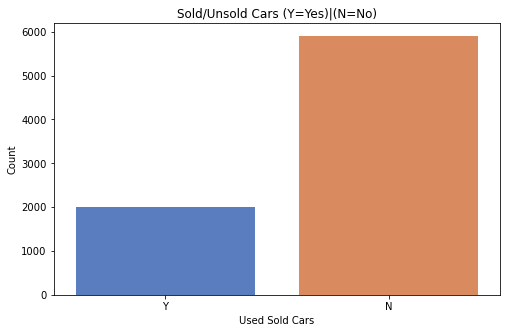

In [29]:
#Setting Variable to the Defined Function Viz1
sold = car.sold
df = car
viz1(sold, df)

plt.title('Sold/Unsold Cars (Y=Yes)|(N=No)')
plt.xlabel('Used Sold Cars')
plt.ylabel('Count');


#Check the value counts to confirm occurrence of the used sold cars
car.sold.value_counts()

### Distrbution of cars by Region

Distribution of car by Region shows that the Central region have more distribution of cars more followed by the West, East and lastly the South Region.

I will be Creating a relative frequency plot of the proportion of car with each region, sorted from most frequent to least

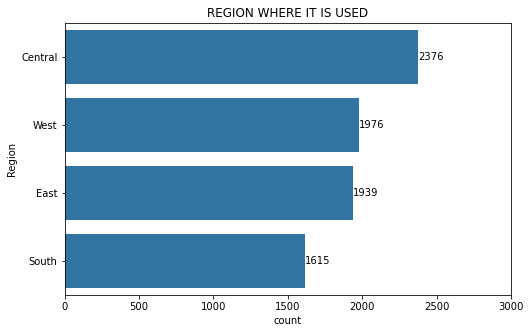

In [7]:
#Creating a relative frequency plot of the proportion of car with each region, sorted from most frequent to least
#Fixed figure size
plt.figure(figsize = [8, 5]) 

#Set base color
base_color = sb.color_palette()[0]

#Put Region column value counts in a list
reg_count = car['Region'].value_counts()
reg_order = reg_count.index

#Plot
sb.countplot(data = car, y='Region', color = base_color, order = reg_order )
listing = list(reg_count)

#Loop within the reg_count list
for index, value in enumerate(listing):
    plt.text(value,index, str(value), va = 'center')
    plt.title('REGION WHERE IT IS USED')
    plt.ylabel('Region')

#set_ylimit
plt.xlim((0,3000))
plt.show()

### Fuel used by car engine

Most of the cars in the dataset are either petrol or diesel based. The diesel is the highest fuel type

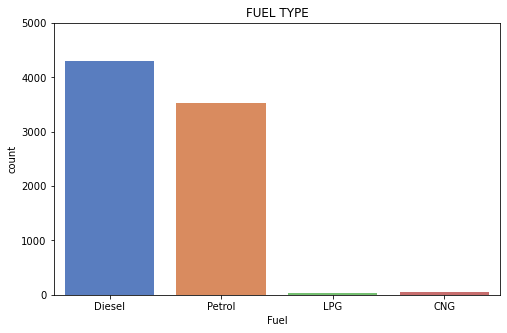

In [8]:
#Setting Variable to the Defined Function Viz1
fuel = car.fuel
df=car
viz1(fuel, df)

plt.title('FUEL TYPE')
plt.xlabel('Fuel')
plt.ylim((0,5000));

### Transmission Type of the Cars

Manual transmission is the highest transmission type of the cars with count above 6000.

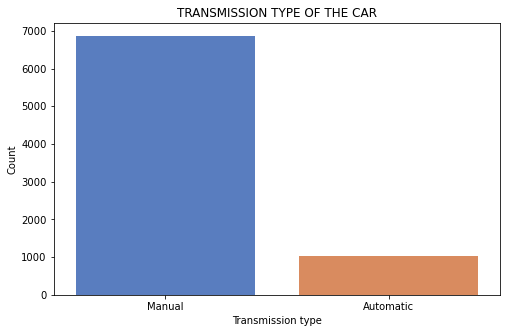

In [9]:
#Setting Variable to the Defined Function Viz1
transmission = car.transmission
df = car
viz1(transmission, df)

plt.title('TRANSMISSION TYPE OF THE CAR')
plt.xlabel('Transmission type')
plt.ylabel('Count');

### What are the State/Province where it is used?

California is the highest from the state/provonce where thee cars are mostly used and Wyoming is the least

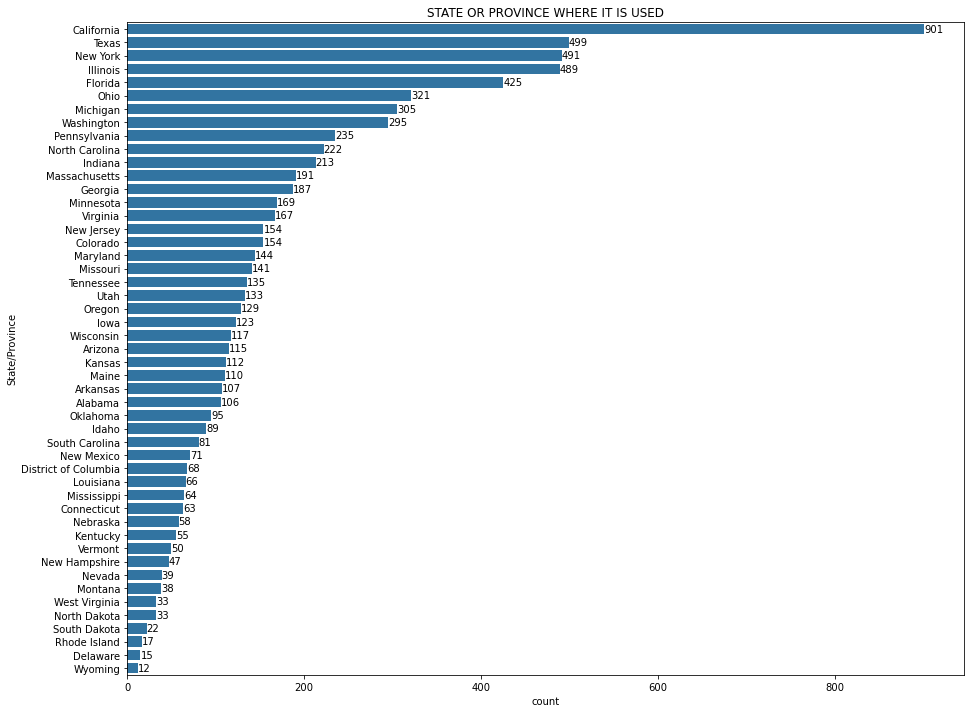

In [10]:
#Creating a relative frequency plot of the proportion of Cars with each State/Province, sorted from most frequent to least.

#Fixed figure size
plt.figure(figsize = [15, 12])

#Put State or Province column value counts in a list
type_counts = car['State or Province'].value_counts()
type_order = type_counts.index

#Plot
sb.countplot(data = car, y='State or Province', color = base_color, order = type_order )
listing = list(type_counts)

#Loop within the type_count list
for index, value in enumerate(listing):
    plt.text(value, index, str(value),  va = 'center')
    plt.title('STATE OR PROVINCE WHERE IT IS USED')
    plt.ylabel('State/Province')

plt.show()

### Distribution of the cars

Maruti (2367) is the highest in occurrence of the used cars and Opel (1) is the least

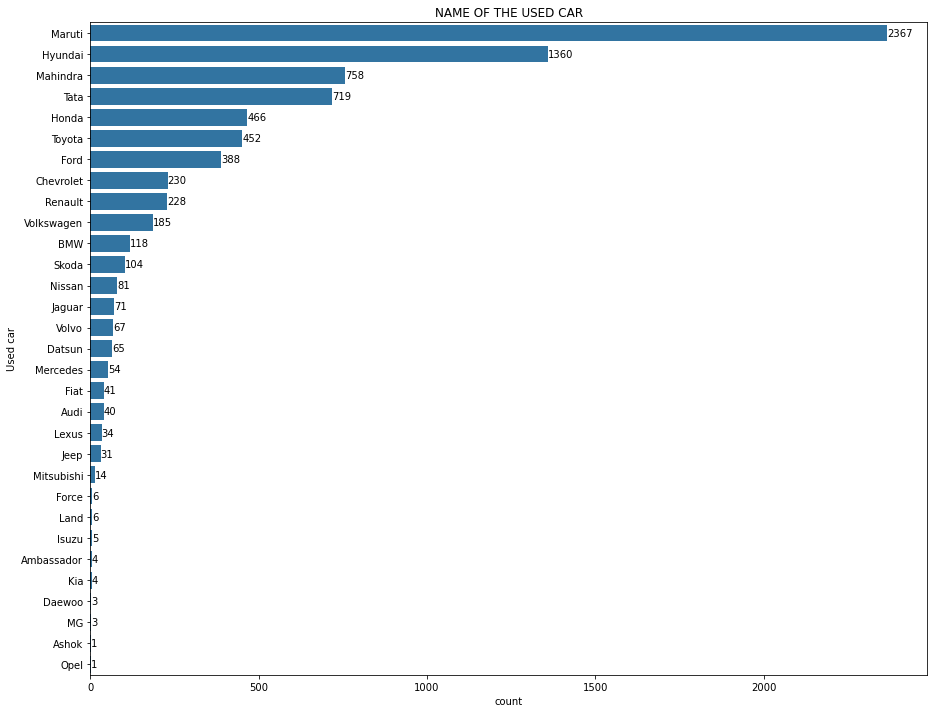

In [11]:
#Creating a relative frequency plot of the proportion of Cars Name, sorted from most frequent to least.

#Fixed figure size
plt.figure(figsize = [15, 12])

#Put name column value counts in a list
type_counts = car['name'].value_counts()
type_order = type_counts.index

#Plot
sb.countplot(data = car, y='name', color = base_color, order = type_order )
listing = list(type_counts)

#Loop within the type_count list
for index, value in enumerate(listing):
    plt.text(value, index, str(value),  va = 'center')
    plt.title('NAME OF THE USED CAR')
    plt.ylabel('Used car')

plt.show()

### Year of car purchase

2017 became the year cars were sold the most. 1010 cars was sold in the year 2017, and just a car was sold in the year 1995

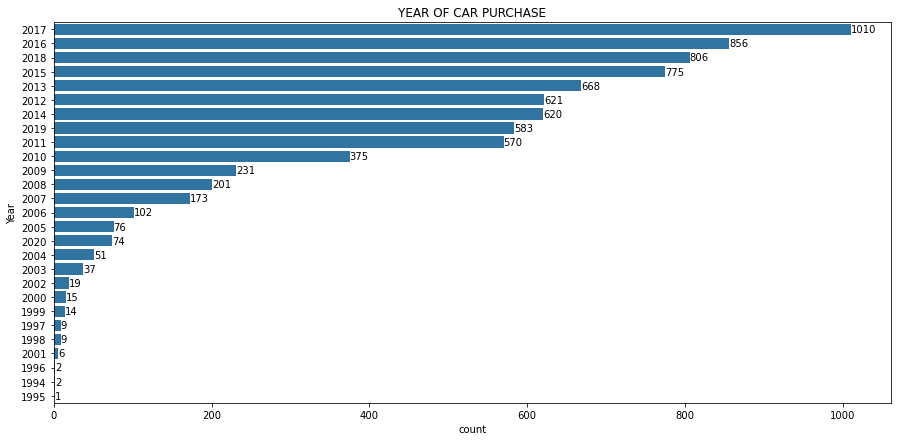

In [12]:
#Creating a relative frequency plot of the proportion of Cars Year of car purchase, sorted from most frequent to least.

#Fixed figure size
plt.figure(figsize = [15, 7])

#Put year column value counts in a list
type_counts = car['year'].value_counts()
type_order = type_counts.index

#Plot
sb.countplot(data = car, y='year', color = base_color, order = type_order )
listing = list(type_counts)

#Loop within the type_count list
for index, value in enumerate(listing):
    plt.text(value, index, str(value),  va = 'center')
    plt.title('YEAR OF CAR PURCHASE')
    plt.ylabel('Year')

plt.show()

### Distribution(s) of my variable(s) of interest

> What are the highest mileages of cars in the data set? : The highest Mileages are around 18-21
  
> Kilometer Driven by Cars : Majoirty of the cars have not been driven much as the maximum car has moved 2,360,457km, and the **viable** movement is slightly above 500,000km 
  
> Distribution of selling price of car : Most of the selling price falls between (0 -2m) and the highest occurrence is 300k in INR

> Distribution of Used sold cars : Most of the cars are yet to be sold, about 2,000 sold and 5,906 yet to be sold
  
> Distrbution of cars by Region : Distribution of car by Region shows that the Central region have more distribution of cars more followed by the West, East and lastly the South Region

> Fuel used by car engine : Most of the car engines in the dataset are either petrol or diesel based

> Number of car seats : More than 6000 cars uses 5 car seats, More than 1000 cars uses 7 car seats
  
> Distribution of Car Owners : More than 5000 cars are from the First owner. Close to 2000 cars are from second owner less than 1000 cars are shared by the rest of the owner type (Third, Fouth, and Test Drive car)

> Transmission type of the car : There is a relatively high Manual transmaission compared to Automatic

> State/Province where it is used : California (901) has the highest Stae where the car are used followed by Texas(499)

> Name of used car : Marauti(2367) and Hyundai(1360) are the highest in Used cars. The rest Used cars are below 800 by count

> Year of car purchase : 2017 was the highest year used car was purchased the most. 1010 Used cars was purchased.
  
> Seller Type : There are three seller type after visualizing the column, individual seller hit the highest point of over 6000 counts followed by dealer and Trust mark dealer with 1000 and greatly less than 1000 respectively
  
> Engine Power : The engine is at highest around 1100-1300.

### BIVARIATE EXPLORATION

> In this section, i will investigate relationships between pairs of variables in my data. Making sure the variables that i cover here have been introduced in some
fashion in the previous section (univariate exploration).

> I will also be using the "Question-Visualization-Observations" framework throughout the exploration. This framework involves asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.

### What are the cars with the highest petrol usage?

Maruti and Hyundai, have petrol as their highest fuel usage, while; Toyota, Ford, Mahindra, Tata, are the cars with the highest Diesel usage

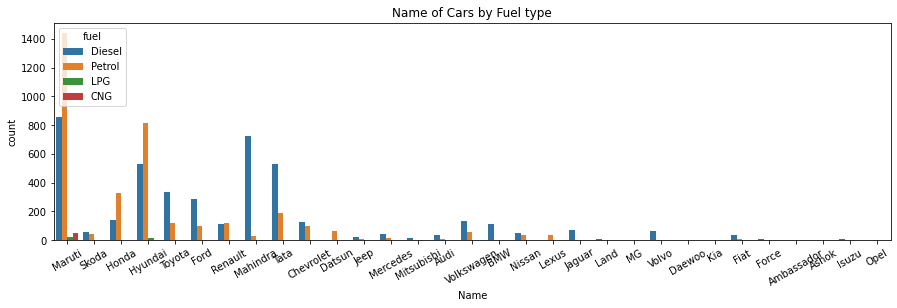

In [13]:
#Fixed figure size
plt.figure(figsize = [15, 4])

#Plot
sb.countplot(data = car, x = 'name', hue = 'fuel')

#Plot title, xlabel and ticks
plt.title('Name of Cars by Fuel type')
plt.xlabel('Name')
plt.xticks(rotation=30);

### What are the cars with the highest individual seller type?

From the count plot, it is seen the Maruti, Hyundai, Mahindra, Tata are clearly the cars with the most individual Seller_Type.

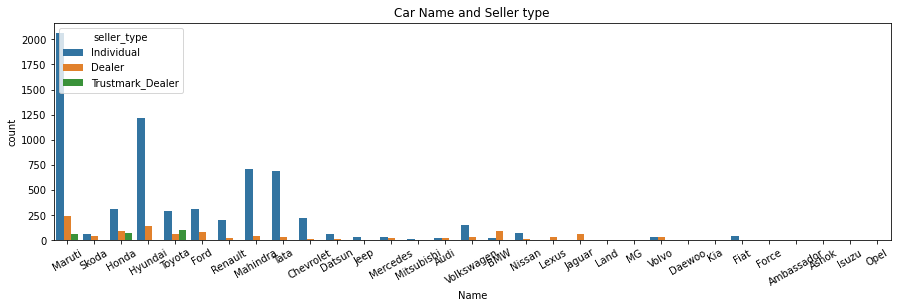

In [14]:
#Fixed figure size
plt.figure(figsize = [15, 4])

#Plot
sb.countplot(data = car, x = 'name', hue = 'seller_type')

#Plot title, xlabel and ticks
plt.title('Car Name and Seller type')
plt.xlabel('Name')
plt.xticks(rotation=30);

### Close to 7000 cars are of Manual transmission, but, What are the cars with the highest manual transmission?

Just to mention a few from the visualization, Maruti, Hyundai, Mahindra, Tata are the cars with the highest Manual transmission, and cars like Mercedes, BMW, Lexus, Jaguar, Volvo are the cars with the highest Automatic Transmission

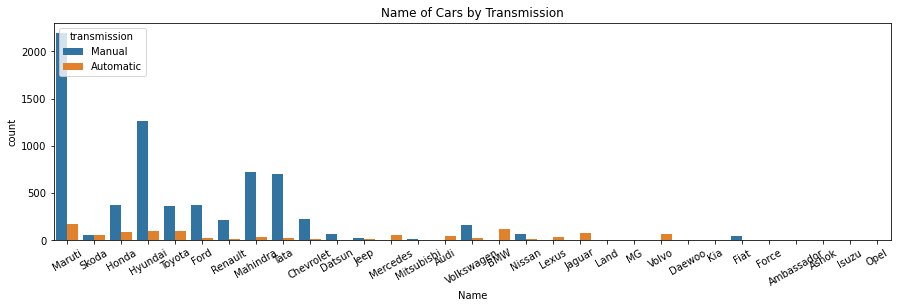

In [15]:
#Fixed figure size
plt.figure(figsize = [15, 4])

#Plot
sb.countplot(data = car, x = 'name', hue = 'transmission')

#Plot title, xlabel and ticks
plt.title('Name of Cars by Transmission')
plt.xlabel('Name')
plt.xticks(rotation=30);

### Which cars were sold and which are not sold yet?

Most of the used cars have not been sold. Marauti have the highest number of unsold cars followed by Hyundai, Mahindra, Tata...

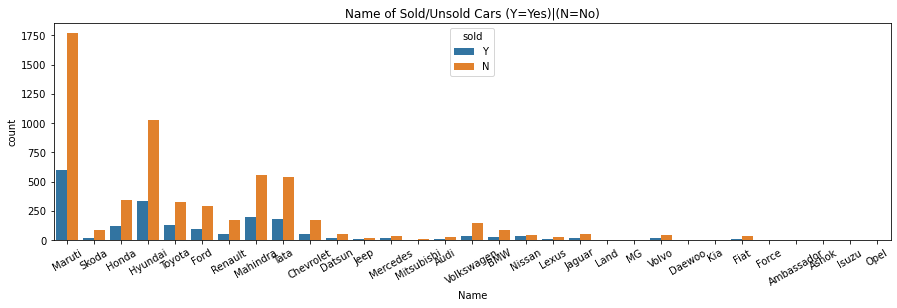

In [16]:
#Fixed figure size
plt.figure(figsize = [15, 4])

#Plot
sb.countplot(data = car, x = 'name', hue = 'sold')

#Plot title, xlabel and ticks
plt.title('Name of Sold/Unsold Cars (Y=Yes)|(N=No)')
plt.xlabel('Name')
plt.xticks(rotation=30);

### In what year did Used cars got costler?

The greater the year, the costler cars became. At around 2010, cars were less than 3million INR, and later increased gradually above 6million from 2017-2019

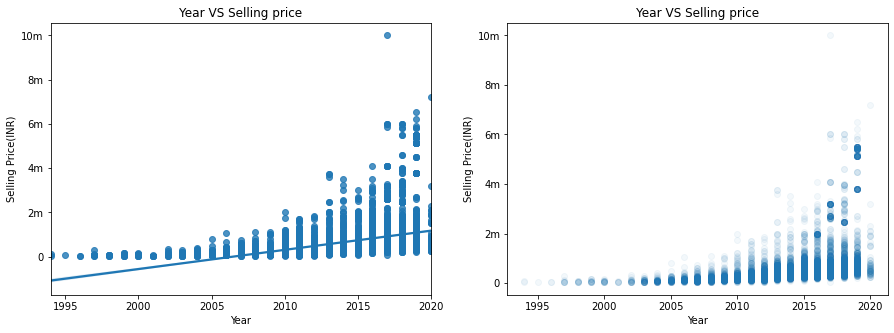

In [17]:
# Resize figure to accommodate two plots
plt.figure(figsize = [15, 5])


# Plot of Left - simple scatter
plt.subplot(1, 2, 1)
sb.regplot(data = car, x ='year', y='selling_price')
plt.title('Year VS Selling price')
plt.xlabel('Year')
plt.ylabel('Selling Price(INR)')
#convert the x-axis to a exponential figure
#The selling price at the left having 0.2(1e7) = 2e6 = 2million and same thing goes for 4,6,8,10.
plt.yticks([0, 2e6, 4e6, 6e6, 8e6, 10e6], [0, '2m','4m','6m','8m','10m'])

# Plot on Right - scatter
plt.subplot(1, 2, 2)

# In the sb.regplot() function below, the `truncate` argument accepts a boolean.
# If truncate=True, the regression line is bounded by the data limits. 
# Else if truncate=False, it extends to the x axis limits.

sb.regplot(data = car, x ='year', y='selling_price', truncate=False, fit_reg =False, scatter_kws ={'alpha':1/20}) 
plt.title('Year VS Selling price')
plt.xlabel('Year')
plt.ylabel('Selling Price(INR)')

#convert the x-axis to a exponential figure
#The selling price at the left having 0.2(1e7) = 2e6 = 2million and same thing goes for 4,6,8,10.
plt.yticks([0, 2e6, 4e6, 6e6, 8e6, 10e6], [0, '2m','4m','6m','8m','10m'])
plt.show();

### MULTIVARIATE EXPLORATION

> In this section, i will create plots of three or more variables to investigate my data even
  further

### Accertain if cars were sold and perhaps the seller type

Cars that are sold are lesser compared to the ones that aren't sold yet, the individual seller type have over 4000 cars unsold and close to 2000 cars sold

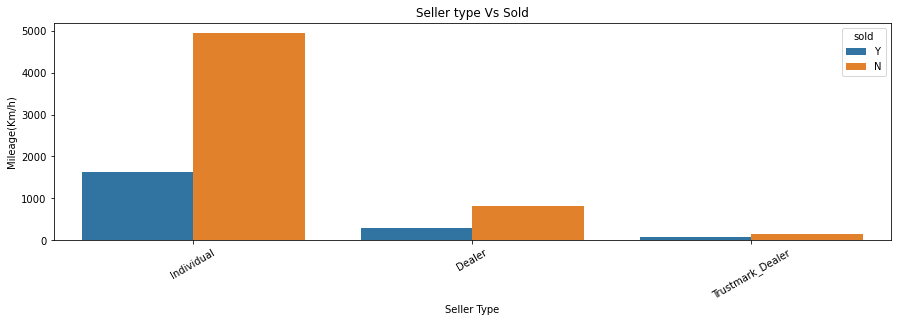

In [18]:
#Fixed figure size
plt.figure(figsize = [15, 4])
#Plot
sb.countplot(data = car, x = 'seller_type', hue = 'sold')

#Plot title,xlabel,ylabel ticks
plt.title('Seller type Vs Sold')
plt.xlabel('Seller Type')
plt.ylabel('Mileage(Km/h)')
plt.xticks(rotation=30);

### Understanding in details the Selling price of cars by Year

The visualization above tell alot of story, but just to mention an interested few;

* Fewer cars was sold in the year 1995 and below at a price lesser than 1m INR
* Car prices increase with the ascending year.
* At around 2017 upwards, many of the car prices ranges from 1m to 8m (INR)

> NOTE : Volvo has an outstanding price of 10m INR 

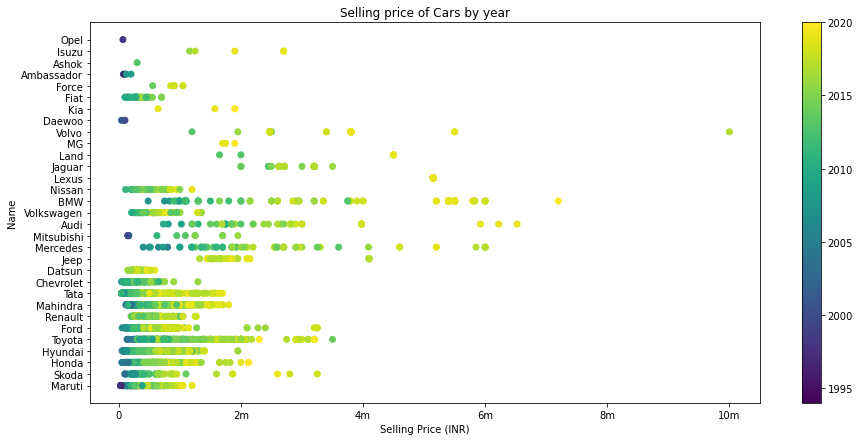

In [19]:
#Fixed figure size
plt.figure(figsize = [15, 7])

#Plot
plt.scatter(data = car, x = 'selling_price', y = 'name', c = 'year')

#Plot title,xlabel,ylabel ticks
plt.title('Selling price of Cars by year')
plt.xlabel('Selling Price (INR)')
plt.ylabel('Name')

#convert the x-axis to a exponential figure
#The selling price at the left having 1.0(1e6) = 1e6 = 1000000
plt.xticks([0, 2e6, 4e6, 6e6, 8e6, 10e6], [0, '2m','4m','6m','8m','10m'])
plt.colorbar()
plt.show()

### Understanding in details the State/Province of cars by Mileage and Km Driven

* Almost all of the cars range from 0-500,000 in km except for some Maurati and Toyota greater than 500,000km
* Most of the cars have a mileage of above 10km/hr except for the Maurati cars having the highest mileage, above 30 km/hr
* California is tthe State or Province where points are more populated, after adding some transpearancy (alpha)

<Figure size 576x360 with 0 Axes>

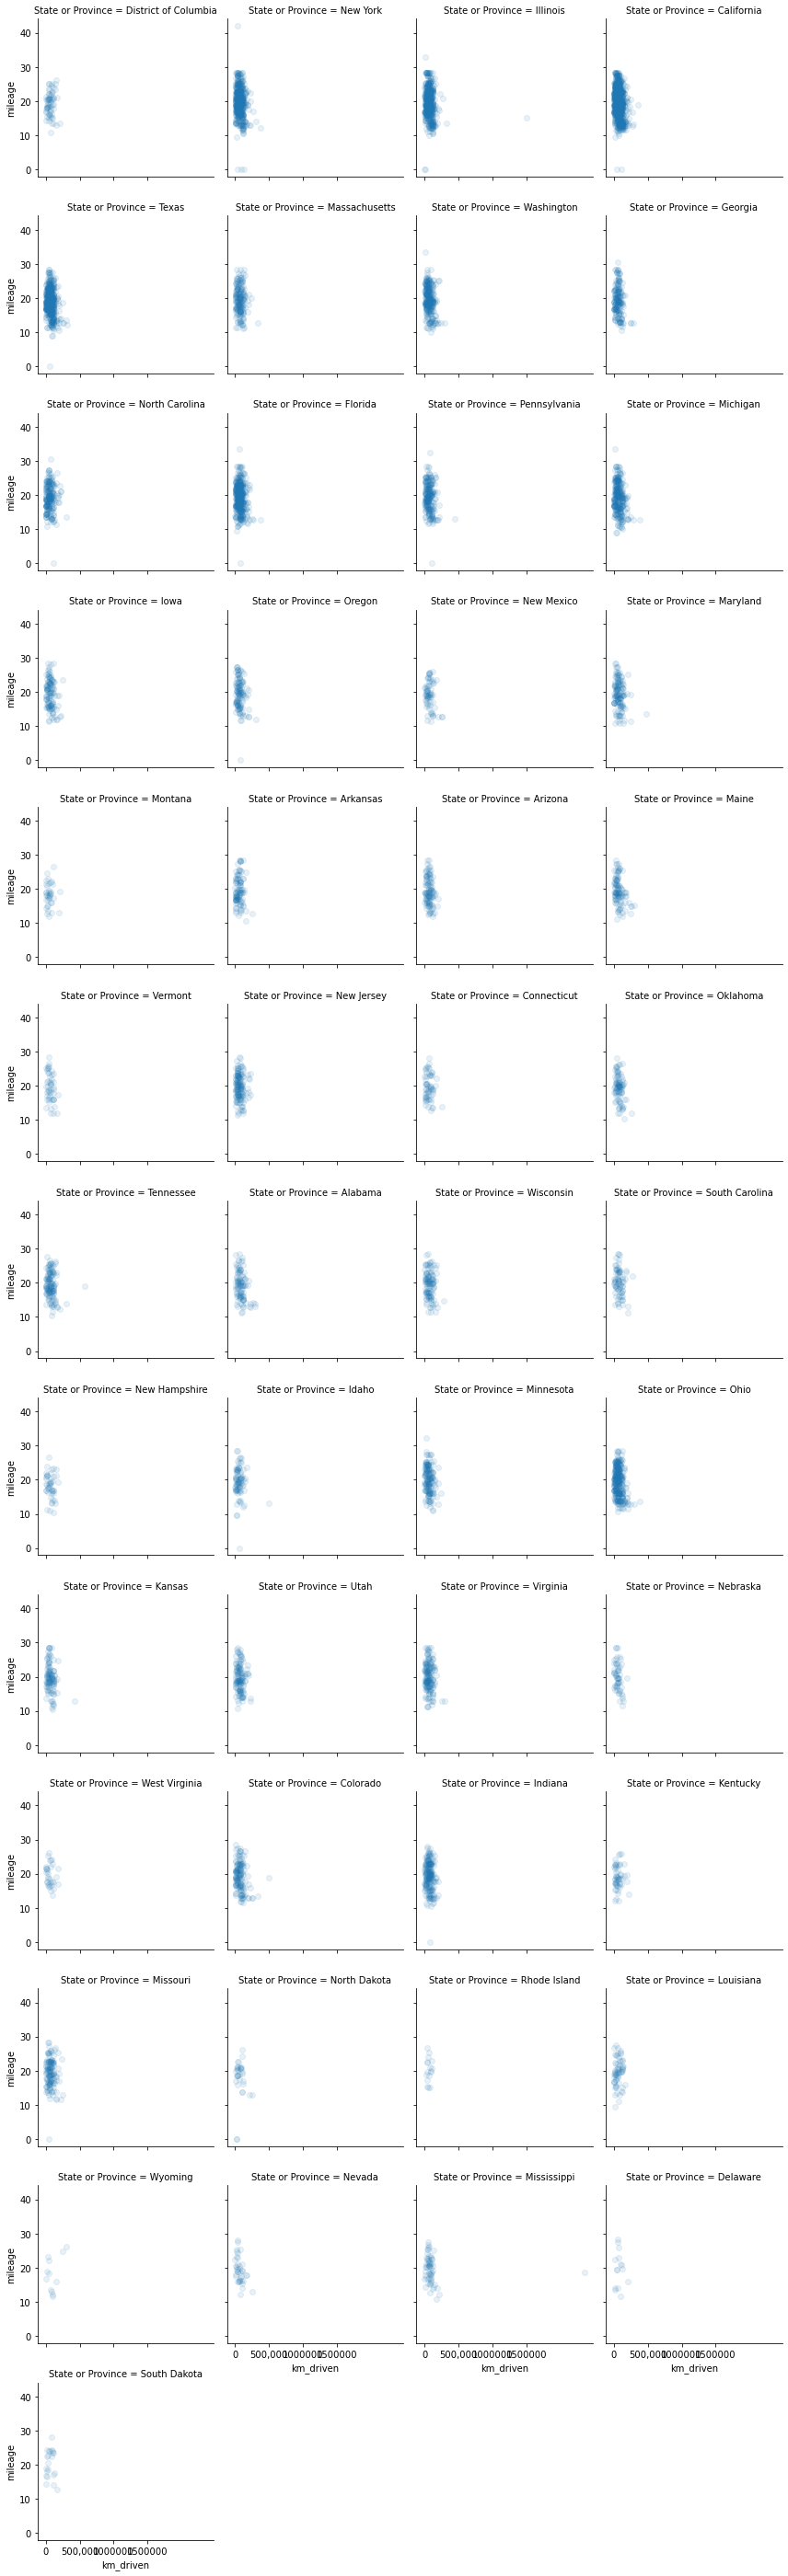

In [20]:
# Resize figure to accommodate plots
plt.figure(figsize = [8, 5])

#Plot
g = sb.FacetGrid(data = car, col = 'State or Province', col_wrap = 4)
g.map(plt.scatter, 'km_driven', 'mileage',alpha=1/10 )

#Plot xlimit, ticks
#convert the x-axis to a exponential figure
#The km driven at the left having 1.0(1e6) = 1e6 = 1000000
plt.xticks([0, 0.5e6, 1.0e6, 1.5e6], [0, '500,000','1000000','1500000'])
ax.set_xlim([0, 1500000])
plt.show();

### Trends showing what type of transmission had the highest price for fuel type

* Diesel seem more expensive than the rest of the fuel used by the cars
* The fuels used by the cars kept increasing in price per year for the manual transmission
* The fuels used by the cars flunctuate in price for the Automatic transmission and getting to 2020, it decreased in price

<Figure size 864x576 with 0 Axes>

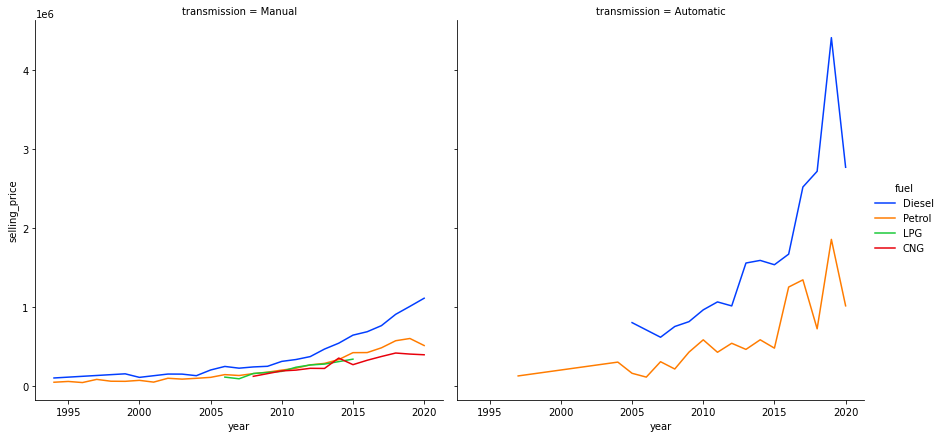

In [21]:
# plotting a lineplot using transmission and fuel for determining the facet of the grid

plt.figure(figsize=(12,8));
sb.relplot(data =car,x ='year',y ='selling_price',palette= 'bright',height =6,kind ='line',col = 'transmission',hue ='fuel',ci = None);

* Diesel seem more expensive than the rest of the fuel used by the cars
* The fuels used by the cars kept increasing in price per year for the manual transmission
* The fuels used by the cars flunctuate in price for the Automatic transmission and getting to 2020, it decreased in price

#### THE MARUTI CAR


> The Marati sounds more popular than the other cars but it clearly one of the cheapeast of them all

* It has the highest occurrence = 2367
* It has the highest year purchase occurrence = (2017), 1010
* It individual seller type is greater than 2000
* It uses Petrol more as its fuel
* It uses the manual mode of transmission graeter than 2000 by count
* It has a Km above the general km, 500,000km
* It has the highest mileage > 30km/hr

> Aside all the goodies above, 
* It is the car that have the highest count unsold above 1750 by count
* It is the car that have the highest count sold above 500 by count
* It is one of the cheapest cars less than 2million INR

## Conclusions

This is a large dataset of different types of used cars, trying to break through the market. There are thirty-one brands of cars which range accross Maruti, Hyundai, Tata, Mercedes, BMW, Toyota, just to mention but a few. Mileages and kilometer driven are great factors to be put into consideration in sales of used cars. The Higher the mileage, the faster the car, the higher the kilometer driven, the weaker the engine. Almost all of the cars range from 0-500,000 in km except for some Maurati and Toyota greater than 500,000km.

* The Maruti cars have the highest **mileage**, they are above 30 km/hr

* Maruti, Hyundai, Mahindra, Tata are clearly the cars with the most **individual Seller_Type**.

* Maruti and Hyundai, have petrol as their highest **fuel** usage, while; Toyota, Ford, Mahindra, Tata, are the cars with the highest Diesel usage 

* Maruti, Hyundai, Mahindra, Tata are the cars with the highest Manual **transmission**, and cars like Mercedes, BMW, Lexus, Jaguar, Volvo are the cars with the highest Automatic Transmission.

* Most of the used cars have not been **sold**. Marauti have the highest number of unsold cars followed by Hyundai, Mahindra, Tata...


Among many features it can be said that Year, Name, Region & State are categories which affect buying and selling of car. Fuel feature does not affect buying and selling of car. The greater the year, the costler cars became. At around 2010, cars were less than 3million INR, and later increased gradually above 6million INR from 2017-2019


* It is assumed that because most of the cars are purchased between 2017-2019 hence, less number of cars are being sold.

* Fewer cars was sold in the year 1995 and below at a price lesser than 1m INR

* Car prices increase with the ascending year.

## THANK YOU

In [32]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 1419794 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Owner\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Owner\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Owner\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\Owner\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Owner\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook